# Part 2

This exercise builds on the concepts of Finite Element Method that were introduced in Exercise 1. We will focus on solving a more complex problem, where the solution is a vector fields (instead of scalar) and we apply a combination of two different types of boundary conditions.

## Problem Description

Modelling displacement and stress is fundamental in engineering and geoscience, because it allows us to understand the material behaviour under various loads and conditions. Displacement captures the change in position of a point or body from the intial position due to forces. By accurately modeling displacement, we can compute stresses and determine whether a material will deform elastically, yield, or fracture under load. Finite Element Method is widely used to model the displacement and stresses in a domain. In engineering, it helps to ensure structural integrity of buildings, aircrafts etc. In geoscience, it is useful in modelling underground structures, such as tunnels, reserviours and modelling fracturing of subsurface.

In this exmaple we will model how a cantilever beam will deform when subjected to a point load.

Imagine we have a beam of length $L=60$ and height $2c = 3$ that is attached to a wall on one side and there is a load $P =80$ applied to the point on free hanging side. If the load is strong enough, the beam will bend. We can model that deformation using Finite Element Method, by solving for displacement


<img src="img/Cantilever_diagram.png" alt="Cantilever_diagram" width="600">

### Variational form of Linear Elasticity
For derivation of the weak form of the governing equations for FEM, understandning of the relationships between stress, strain, forces and displacements become important.
- displacement ($u$) is the vector that describes the movement of a object 
- strain ($\varepsilon$) measures the deformation of an object due to applied loads
- stress ($\sigma$) measures the internal forces within the material due to the applied loads

In this example linear elasticity is assumed, meaning that there is a linear relationship between stress and strain. This is true for small deformations (i.e. displacement). However, this relationship does not hold for large displacements and non-linear relationship arises. 

The equation of equilibrium in terms of stress is given by

$$ \nabla \cdot\sigma + \textbf{F} = 0 $$

where $\nabla$ is the divergence operator, defined in two-demensional space as $(\frac{\partial}{\partial x},\frac{\partial}{\partial y})$,   $\sigma$ represents the internal stress, and $\textbf{F}$ is a body force per unit area. This equation states the condition of static equilibrium, the sum of internal forces (represented by divergence of stress) and the external forces ($F$) must balance out. 

From this equation of equilibrium, the variational form used in Finite Elemeent Method can be derived. While we will not provide the full derivation due to its length, we will outline the key relations that lead to the final result.

Since we are solving for displacement $u$, the variational form must be expressed in terms of displacement expressing the internal and external forces separately. Let us first deal with the internal stresses, the external stresses are applied as boundary conditions in later section.
To derive the variational for the following relations are used:

- **small strain-displacement relation**:
    This relation expresses strain $\varepsilon$ in terms of displacement $u$
    $$
    \begin{equation}
    \begin{bmatrix} 
    \varepsilon_{xx} \\ 
    \varepsilon_{yy} \\ 
    \gamma_{xy} 
    \end{bmatrix}
    =
    \begin{bmatrix} 
    \frac{\partial u_x}{\partial x} \\ 
    \frac{\partial u_y}{\partial y} \\ 
    \frac{\partial x}{\partial y} + \frac{\partial u_y}{\partial x} 
    \end{bmatrix}
    \end{equation}
    $$

    where $u_x$ and $u_y$ is the displacemnt in $x$ and $y$ directions respectively and $\varepsilon$ is the strain of the object. It describes how much the object deforms in particular direction, the strains $\varepsilon_{xx}$ and $\varepsilon_{yy}$ measure how much the object streches in the $x$ and $y$ directions repectively, while the $\varepsilon_{xy}$ is the shear strain that measures how much the object distorts. 
    
    
- **small strain-stress relation** (Hooke's law for continuious domain) 
   This relation states that we can express stress $\sigma$ in terms of strain using the material stiffness marix $\textbf{D}$:

    $$\sigma = \textbf{D}\varepsilon$$
    
    The matrix $\textbf{D}$ is defined in section ??? below.

We will build on these relations in later section to understand how the element stiffness matrix get accumulated. Then using these relations and the Green's theorem the weak form is 

$$\int_\Omega \textbf{B}^T \textbf{D}\textbf{B} d\Omega = \textbf{F} ,$$
where $\textbf{D}$ is a material matrix from the strain-stress relation, $\textbf{B}$ is a derivative matrix of displacement $u$ from the strain-displacement relation and $\textbf{F}$ are the external forces. The left-hand size of the equation is what we will be accumulating on the element-by-element basis into the global matrix $A$ and the right hand side are the boundary conditions.

As in Part 1 exercise, let us follow the same structure in setting up the problem.


##  Step 1. Domain Set Up and Meshing
The domain set up and meshing does not depend on the solution variable type (i.e. sclar/ vector). Hence this step is the same as in Part 1. 
The domain set up only depends on the refinement of the domain and type of elements we have to use. However, it is generally good to review the ODE/PDE that is being solving to understand the degree of the differential equation, as this will guide the element degree. In this example we will use elements of degree two. The function below will create and mesh the domain using the inputs provided below in the same way as in first example.


In [2]:
import sys
sys.path += [".", ".."]
from FEM_Module.FEM_Module_class import FEM_model
# from FEM_Module.FEM_Module_class import FEM_model
# import meshio
import matplotlib.pyplot as plt
import numpy as np
import os

from matplotlib.tri import Triangulation

### Exercise
Using the details below set up the boudaries of the domain:
- length in $x$ direction is $60$ from origin
- length in $y$ direction is $3$ and it is symmetric around the origin
- two dimensional problem

Then specify the type and size of elements that we want to use:
- quadratic elements
- element size = 2 

We can visualise this domain by using the function `visualise_mesh()` in module FEM_model .

In [ ]:
# ------------ User Input required --------------------#
## Domain Definition ##
x_start =
x_end = 
y_start = 
y_end = 
domain_dim = 


### Input Element Type 
element_degree =  # specify the element order
element_length =  # specify the domain refinement. Finer meshes lead to more accurate solution


# ------------ End of User Input  --------------------#


In [3]:
###########SOLUTION
########### The following inputs can be changed ################
## Domain Definition ##
x_start = 0
x_end = 60
y_start = -1.5
y_end = 1.5
domain_dim = 2


### Input Element Type 
element_degree = 2 # specify the element order
element_length = 2 # specify the domain refinement. Finer meshes lead to more accurate solution


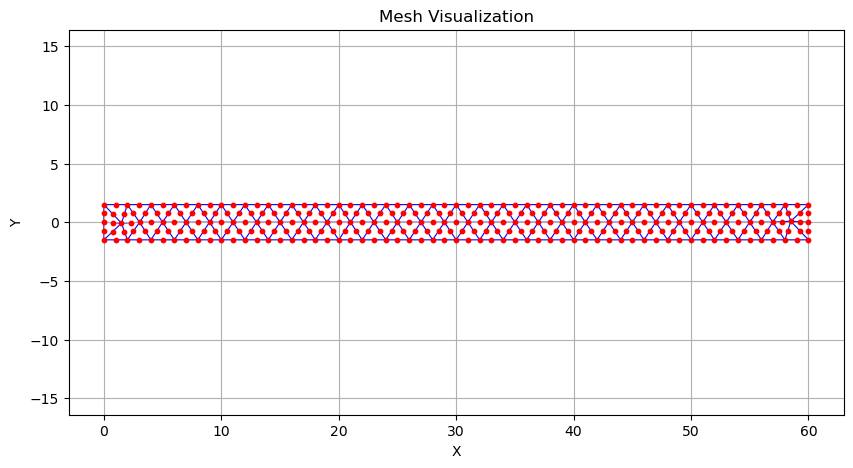

In [4]:
# Initialing the FEM model
FEM_ = FEM_model(domain_dim)

L=x_end- x_start
t=1
c=(y_end-y_start)/2.

## Create the domain name
FEM_.domain_mesh(element_degree, element_length, [x_start,x_end], [y_start,y_end])
FEM_.visualise_mesh()

## Step 2. Key Element Functions

One of the key steps in Finite Element Method is applying the basis functions to assemble the linear system of equations that represent the weak form of the governing equation. The basis functions do not change depending on whether the solution is a vector or scalar field. However, the key difference lies in:

**Structure of the solution field**. 

In the previous exercise, temperature was treated as a scalar field, meaning each node had only a single associated value. Consequently, there was only one degree of freedom per node. However, when solving for vector fields, multiple degrees of freedom exist at each node because particles can move in multiple dimensions. This is reflected in the structure of the solution vector $u$. 
    
There are different ways to organize the solution vector, but it is crucial to maintain consistency in the chosen structure. One approach is to order by dimension, where all degrees of freedom in the $x$-direction appear first, followed by those in the $y$-direction. Alternatively, we can order by node ID, where each node's $x$- and $y$-components are stored consecutively. We adopt the node ordering, resulting in the following structure for solution vector $u$:
    
    
$$u=\begin{bmatrix} u^0_x\\ u^0_y \\  u^1_x\\ u^1_y\\... \\ u^m_x \\ u^m_y  \end{bmatrix}$$

where $u^i_x$ and $u^i_y$ represent the displacement in $x$ and $y$ directions at node $i$ and $m$ is the total number of nodes in the mesh. This structure must be  accounted for when assembling the element-level stiffness matrix into the global system matrix $A$.



## Step 3. Matrix Assembly

Recall that the left hand side of the weak form that we need to accumulate is 
$$\int_\Omega \textbf{B}^T \textbf{D}\textbf{B} d\Omega $$

Let us now define in more detail what the matrix $\textbf{B}$ and $\textbf{D}$ are. 

From the "Variational form of Linear Elasticity" section we have defined the **small strain-displacement relation** as 
    This relation expresses strain $\varepsilon$ in terms of displacement $u$
    $$
    \begin{equation}
    \begin{bmatrix} 
    \varepsilon_{xx} \\ 
    \varepsilon_{yy} \\ 
    \gamma_{xy} 
    \end{bmatrix}
    =
    \begin{bmatrix} 
    \frac{\partial u_x}{\partial x} \\ 
    \frac{\partial u_y}{\partial y} \\ 
    \frac{\partial x}{\partial y} + \frac{\partial u_y}{\partial x} 
    \end{bmatrix}
    \end{equation}
    $$

Given that displacement $u$ in any element $e$ can be expressed as the linear combination of the nodes in that element:
$$u_x = \sum_{i=0}^n N^i u_x^i$$
where $N^i$ is the shape function local node $i$ and $n$ is the number of nodes in the element. Then the strain matrix above can be rewritten as :
 

\begin{equation}
\begin{bmatrix} 
\varepsilon_{xx} \\ 
\varepsilon_{yy} \\ 
\gamma_{xy} 
\end{bmatrix}
=
\begin{bmatrix} 
\frac{\partial N^1}{\partial x} & 0 & \frac{\partial N^2}{\partial x} & 0 &\cdots& \frac{\partial N^n}{\partial x} & 0\\
0 & \frac{\partial N^1}{\partial y} & 0 & \frac{\partial N^2}{\partial y} &\cdots& 0 &\frac{\partial N^n}{\partial y}\\
\frac{\partial N^1}{\partial y} & \frac{\partial N^1}{\partial x} & \frac{\partial N^2}{\partial y} &\frac{\partial N^2}{\partial x} &\cdots& \frac{\partial N^n}{\partial y} & \frac{\partial N^n}{\partial x}\\
\end{bmatrix}
\begin{bmatrix} u^0_x\\ u^0_y \\  u^1_x\\ u^1_y\\\vdots \\ u^n_x \\ u^n_y \end{bmatrix} = \textbf{B}u
\end{equation}

We have also previously defined strain-stress relation as 
$$\sigma = \textbf{D}\varepsilon$$
where matrix $\textbf{D}$ is 

\begin{equation}
\textbf{D} = \frac{E(1-\nu)}{(1+\nu)(1-2\nu)}
\bigg[
\begin{array}{cc} 
1 & \frac{\nu}{1-\nu}\\
\frac{\nu}{1-\nu} & \frac{1-2\nu}{2(1-\nu)}
\end{array}
\bigg]
\end{equation}

where $E$ and $\nu$ are the material properties: the Young's modulus and the Poisson ratio respectively.

### Exercise
Following the same structure as in part 1. Accumulate for an elemeent $e$ the following equation: $$\int_\Omega \textbf{B}^T \textbf{D}\textbf{B} d\Omega $$

Let Young's modulus be 1,000,000 Pa and Poisson's ratio 0.25 and matrices $\textbf{B}$ and $\textbf{D}$ as defined above. The structure for iterating over each element is given below. 

In [ ]:
## Set up the material properties:

Youngs_modulus =1e6
Poisson_ratio = 0.25

## Set up empty matrix global matrix A and the right hand side vector b

num_nodes = len(FEM_.mesh.points)
A_matrix = np.zeros((num_nodes*domain_dim, num_nodes*domain_dim)) ## note that for each node there are 2 d.o.f
b = np.zeros((num_nodes*domain_dim,))

## Now we iterate through each element in the mesh in the same way before
for element in FEM_.element_list_2D:
    
    # ------------ User Input required ------------------------------------------#
    # -- Step 1. Set the integration points IP and their weights 
    IPs, IP_weights = ...

    # -- Step 2. Create empty LHS matrix for the element stiffness matrix ------------#
    # -- recall that variable element contains the list of the nodes and that each node has 2 d.o.f
    LHS = np.zeros((...
                    
    # -- Step 3. Set up for loop to iterate over each integration point ------------#
    for IP, weight in ...:
                    
        # -- Step 4. Get the list of corner nodes in the element and calculate
        # --------   the Jacobian matrix using function Jacobian in FEM_module
        e_nodes_xy = ...
        detJ, JMat = ...
        
        # -- Step 5. Calculate the derivative basis functions at the integration point 
        # --------   use the function basis_functions_der() and multiply it by the inverse of the Jacobian matrix
        der_matrix = 
        der_matrix_JInv = 
        
        # -- Step 6. Transform the derivative matrix into the B described above
        # --------  use the function dN_To2DOF() in FEM_module
        B = ...    
        # -- Step 7. Take the transpose of the matrix B
        BT = ..
        # -- Step 8. Calculate matrix D. You can use the function stiffness_matrix_2D in FEM module
        # --------   use the material properties Youngs_modulus and Poisson_ratio defined above
        D = 
        
        # -- Step 9. Multiply BT by D
        
        # -- Step 10. Multiply the matrix from Step 9 by B
        
        # -- Step 11. Multiply the final matrix by Jacobian determinant and weight of the integration point
        
        # -- Step 12. Add the resuling matrix to the element stiffness matrix LHS
                    
    # -- Step 13. Accumulate the element stiffness matrix LHS to global matrix A
    # ----------  The accumulation of the first d.o.f for the node is given as a hint
    for i in range(len(element)):
        for j in range(len(element)):
            col = int(element[i])
            row = int(element[j])
            A_matrix[row*domain_dim,col*domain_dim]+= LHS[int(j*domain_dim)][int(i*domain_dim)] # xx
            A_matrix[row*domain_dim,col*domain_dim+1]+=...
            A_matrix...
            A_matrix...


In [5]:
## Set up the material properties:

Youngs_modulus =1e6
Poisson_ratio = 0.25

## Set up empty matrix global matrix A and the right hand side vector b

num_nodes = len(FEM_.mesh.points)
A_matrix = np.zeros((num_nodes*domain_dim, num_nodes*domain_dim)) ## note that for each node there are 2 d.o.f
b = np.zeros((num_nodes*domain_dim,))

## Now we iterate through each element in the mesh in the same way before
for element in FEM_.element_list_2D:
    
    # ------------ User Input required ------------------------------------------#
    # -- Step 1. Set the integration points IP and their weights 
    IPs, IP_weights = FEM_.integrationPoints()

    # -- Step 2. Create empty LHS matrix for the element stiffness matrix ------------#
    # -- recall that variable element contains the list of the nodes and that each node has 2 d.o.f
    LHS = np.zeros((len(element)*domain_dim, len(element)*domain_dim)) 
                    
    # -- Step 3. Set up for loop to iterate over each integration point ------------#
    for IP, weight in zip(IPs,IP_weights):
                    
        # -- Step 4. Get the list of corner nodes in the element and calculate
        # --------   the Jacobian matrix using function Jacobian in FEM_module
        e_nodes_xy = FEM_.global_node_coords[element][:,:3]
        detJ, JMat = FEM_.Jacobian(IP, e_nodes_xy)
        
        # -- Step 5. Calculate the derivative basis functions at the integration point 
        # --------   use the function basis_functions_der() and multiply it by the inverse of the Jacobian matrix
        der_matrix = FEM_.basis_functions_der(IP)
        der_matrix_JInv = np.matmul(np.linalg.inv(JMat), der_matrix)
        
        # -- Step 6. Transform the derivative matrix into the B described above
        # --------  use the function dN_To2DOF() in FEM_module
        B = FEM_.dN_To2DOF(der_matrix_JInv) 
        # -- Step 7. Take the transpose of the matrix B
        BT =  B.transpose()
        # -- Step 8. Calculate matrix D. You can use the function stiffness_matrix_2D in FEM module
        # --------   use the material properties Youngs_modulus and Poisson_ratio defined above
        D = FEM_.stiffness_matrix_2D(Youngs_modulus,Poisson_ratio)        
        
        # -- Step 9. Multiply BT by D
        BT = np.matmul(BT, D)
        # -- Step 10. Multiply the matrix from Step 9 by B
        BT = np.matmul(BT, B)
        # -- Step 11. Multiply the final matrix by Jacobian determinant and weight of the integration point
        BT = BT * weight*(detJ) ## currently assume all the wieght of IP are the same
        # -- Step 12. Add the resuling matrix to the element stiffness matrix LHS
        LHS += BT     
    # -- Step 13. Accumulate the element stiffness matrix LHS to global matrix A
    # ----------  The accumulation of the first d.o.f for the node is given as a hint
    for i in range(len(element)):
        for j in range(len(element)):
            col = int(element[i])
            row = int(element[j])
            A_matrix[row*domain_dim,col*domain_dim]+= LHS[int(j*domain_dim)][int(i*domain_dim)] # xx
            A_matrix[row*domain_dim,col*domain_dim+1]+= LHS[int(j*domain_dim)][int(i*domain_dim+1)] # xy
            A_matrix[row*domain_dim+1,col*domain_dim]+= LHS[int(j*domain_dim+1)][int(i*domain_dim)] # y
            A_matrix[row*domain_dim+1,col*domain_dim+1]+= LHS[int(j*domain_dim+1)][int(i*domain_dim+1)] # y


In [129]:
# #### This is temp cell for develpment and will be the solution for the exercise
# num_nodes = len(FEM_.mesh.points)
# A_matrix = np.zeros((num_nodes*domain_dim, num_nodes*domain_dim)) ## !!
# b = np.zeros((num_nodes*domain_dim,))


# ## Now we iterate through each element in the mesh in the same way before
# for element in FEM_.element_list_2D:
   
#     # get the list of integration points and the list of global IDs for nodes in the element
#     IntegrationPoints, IP_weights = FEM_.integrationPoints()
   
#     e

#     ## we first get the element stiffness matrix for the element by accumulating
#     ## over all the integration points. The element stiffness matrix also has to be adjusted 
#     ## for multiple degree of  freedom
    
    
    
#     ## Iterate over each integration point
#     for IP, weight in zip(IntegrationPoints,IP_weights):
        
        
#         detJ, JMat = FEM_.Jacobian(IP, e_nodes_xy)
#         B = FEM_.basis_functions_der(IP)
#         B_JInv = np.matmul(np.linalg.inv(JMat), B)
#         B_2 =  FEM_.dN_To2DOF(B_JInv)
#         BT = B_2.transpose()
#         D = FEM_.stiffness_matrix_2D(Youngs_modulus,Poisson_ratio)
#         BT = np.matmul(BT, D)
#         BT = np.matmul(BT, B_2)

#         BT = BT * weight*(detJ) ## currently assume all the wieght of IP are the same
#         LHS += BT

#     for i in range(len(element)):
#         for j in range(len(element)):
#             col = int(element[i])
#             row = int(element[j])
#             A_matrix[row*domain_dim,col*domain_dim]+= LHS[int(j*domain_dim)][int(i*domain_dim)] # xx
#             A_matrix[row*domain_dim,col*domain_dim+1]+= LHS[int(j*domain_dim)][int(i*domain_dim+1)] # xy
#             A_matrix[row*domain_dim+1,col*domain_dim]+= LHS[int(j*domain_dim+1)][int(i*domain_dim)] # y
#             A_matrix[row*domain_dim+1,col*domain_dim+1]+= LHS[int(j*domain_dim+1)][int(i*domain_dim+1)] # y


<details>
<summary>Solution</summary>
    sample code
    ```

Youngs_modulus =1e6
Poisson_ratio = 0.25

## Set up empty matrix global matrix A and the right hand side vector b

num_nodes = len(FEM_.mesh.points)
A_matrix = np.zeros((num_nodes*domain_dim, num_nodes*domain_dim)) ## note that for each node there are 2 d.o.f
b = np.zeros((num_nodes*domain_dim,))

## Now we iterate through each element in the mesh in the same way before
for element in FEM_.element_list_2D:
    
    # ------------ User Input required ------------------------------------------#
    # -- Step 1. Set the integration points IP and their weights 
    IPs, IP_weights = FEM_.integrationPoints()

    # -- Step 2. Create empty LHS matrix for the element stiffness matrix ------------#
    # -- recall that variable element contains the list of the nodes and that each node has 2 d.o.f
    LHS = np.zeros((len(element)*domain_dim, len(element)*domain_dim)) 
                    
    # -- Step 3. Set up for loop to iterate over each integration point ------------#
    for IP, weight in zip(IPs,IP_weights):
                    
        # -- Step 4. Get the list of corner nodes in the element and calculate
        # --------   the Jacobian matrix using function Jacobian in FEM_module
        e_nodes_xy = FEM_.global_node_coords[element][:,:3]
        detJ, JMat = FEM_.Jacobian(IP, e_nodes_xy)
        
        # -- Step 5. Calculate the derivative basis functions at the integration point 
        # --------   use the function basis_functions_der() and multiply it by the inverse of the Jacobian matrix
        der_matrix = FEM_.basis_functions_der(IP)
        der_matrix_JInv = np.matmul(np.linalg.inv(JMat), der_matrix)
        
        # -- Step 6. Transform the derivative matrix into the B described above
        # --------  use the function dN_To2DOF() in FEM_module
        B = FEM_.dN_To2DOF(der_matrix_JInv) 
        # -- Step 7. Take the transpose of the matrix B
        BT =  B.transpose()
        # -- Step 8. Calculate matrix D. You can use the function stiffness_matrix_2D in FEM module
        # --------   use the material properties Youngs_modulus and Poisson_ratio defined above
        D = FEM_.stiffness_matrix_2D(Youngs_modulus,Poisson_ratio)        
        
        # -- Step 9. Multiply BT by D
        BT = np.matmul(BT, D)
        # -- Step 10. Multiply the matrix from Step 9 by B
        BT = np.matmul(BT, B)
        # -- Step 11. Multiply the final matrix by Jacobian determinant and weight of the integration point
        BT = BT * weight*(detJ) ## currently assume all the wieght of IP are the same
        # -- Step 12. Add the resuling matrix to the element stiffness matrix LHS
        LHS += BT     
    # -- Step 13. Accumulate the element stiffness matrix LHS to global matrix A
    # ----------  The accumulation of the first d.o.f for the node is given as a hint
    for i in range(len(element)):
        for j in range(len(element)):
            col = int(element[i])
            row = int(element[j])
            A_matrix[row*domain_dim,col*domain_dim]+= LHS[int(j*domain_dim)][int(i*domain_dim)] # xx
            A_matrix[row*domain_dim,col*domain_dim+1]+= LHS[int(j*domain_dim)][int(i*domain_dim+1)] # xy
            A_matrix[row*domain_dim+1,col*domain_dim]+= LHS[int(j*domain_dim+1)][int(i*domain_dim)] # y
            A_matrix[row*domain_dim+1,col*domain_dim+1]+= LHS[int(j*domain_dim+1)][int(i*domain_dim+1)] # y

    ```
</details>

## Apply Boundary Conditions

There are several types of boundary conditions that exist for differential equations. In previous notebook we applied Dirichlet boudnary conditions, where we know the value of a solution at a specific points. Therefore we are able to set the solution nodes at those points to that value. 

Another type of boundary condition that is generally applies in Neumann boundary condition. For this boundary condition we know the value of the derivative of the solution at specific points. For example, applying a load or force to domain as we have in this example is a case of Neumann boundary condition. In thes cases we don't know what the solution value is at the boudary, we only know how it behaves with respect to its adjacent nodes. Therefore, we can't set the right hand side vector to a specific value as we have done before and another method is required. 

Noting that in FEM when we accumulate the left hand side matrix, we aim to replicate the bahaviour of the differential equation on an element by element basis, then to replciate the behaviour of derivative at a boundary we need to do the same with the right hand side vector. 

We follow similar process of accumulation for every element at the boundary but we add it to the RHS vector $b$ instead of the matrix $A$.

In our example we have a combination of boundary conitions, on the left is the Neumann BC due to the force being applied and on the right is the Dirichlet BC due to the cantilever being fixed to the wall and it cannot move.

\int_{\Omega} N \textbf{b} d\Omega+ \int_{\Gamma}N\textbf{t}d\Gamma

#### Exercise. Accumulate the Neumann Boundary condiions

In our case the force is applied to the left side of the domain along the line x=0. Therefore we need to accumulate over line elements that exists along the boundaries and we need the basis functions and their derivatives for 1D elements. 

In [9]:
P =80

In [10]:
def basis_fun_line_quad(point):
    r = point
    N=np.zeros(3)
    N[0] = 0.5*(r*r -r)
    N[1] = 0.5*(r*r +r)
    N[2] = 1-r*r
    return N

def der_basis_fun_line_quad(point):
    r = point
    dN=np.zeros(3)
    dN[0] = r-0.5
    dN[1] = r+0.5
    dN[2] = -2*r
    return dN


# def basis_fun_line_quad(point):
#     r = point
#     N=np.zeros((3,))
#     N[2] = 0.5*(r*r -r)
#     N[1] = 0.5*(r*r +r)
#     N[0] = 1-r*r
#     return N

# def der_basis_fun_line_quad(point):
#     r = point
#     dN=np.zeros((3,))
#     dN[0] = r-0.5
#     dN[1] = r+0.5
#     dN[0] = -2*r
#     return dN

def NeumannStress_value(sigma_x,sigma_y, tau):
    return np.array([[sigma_x, tau], 
                     [tau, sigma_y]])

def Jacobian_1D(pt, element_xy_coord):
    dN = der_basis_fun_line_quad(pt)
    x_vals=element_xy_coord[:,1]
#     print(dN, x_vals)
    return np.dot(dN,x_vals )
   

In [11]:
### Identify the 1D eleemnts that lie on the left hand side boundary: 
left_ = np.where(np.isclose(FEM_.mesh.points[:,0], x_start))[0]

result = np.all(np.isin(FEM_.mesh.cells_dict['line3'], left_), axis=1)
indices = np.where(result)[0]
left_bc=FEM_.mesh.cells_dict['line3'][indices]
left_bc
# for i in FEM_.mesh.cells_dict['line3']

array([[  3, 125, 126],
       [125,   0, 127]], dtype=uint64)

explain here the concept of force being applied along a direction variable and that defines the NeumassStess_value matrix and how we accumulate to a vector and not a matrix

In [12]:
# ## Apply the *********Dirichlet************ BC
# ## Fix LEFT sidde

# for node in left_:
#     x_val = FEM_.mesh.points[node][0]
#     y_val = FEM_.mesh.points[node][1]
#     print(FEM_.mesh.points[node], x_val, y_val)
    
#     ## x axi
#     A_matrix[node*2,:] = 0
#     A_matrix[node*2, node*2] = 1
#     b[node*2 ] = analytical_solution_x(x_val,y_val,P,L,Youngs_modulus,Poisson_ratio,c,t)
#     print(analytical_solution_x(x_val,y_val,P,L,Youngs_modulus,Poisson_ratio,c,t))
    
#     #y axis
#     A_matrix[node*2+1,:] = 0
#     A_matrix[node*2+1, node*2+1] = 1
#     b[node*2+1 ] = analytical_solution_y(x_val,y_val,P,L,Youngs_modulus,Poisson_ratio,c,t)
#     print( analytical_solution_y(x_val,y_val,P,L,Youngs_modulus,Poisson_ratio,c,t))
    
    

In [13]:
## Apply the Neumann BOundary Condition to the rhs vector on the LEFT
#print(left_, FEM_.mesh.points[left_])

## 1D integrastion points
# IP_line = [-np.sqrt(3./5.), 0., np.sqrt(3./5.)]
# IP_w = [5/9.,8./9.,5./9.]
IP_line = [-1/np.sqrt(3.),  1/np.sqrt(3.)]
IP_w = [1.,1.]

for element in left_bc: # for each line element in left boundary
    local_RHS=np.zeros(len(element)*2) ## because 3 nodes but for 2 dim vector there are 2 d.o.f for each node
    element_xy_coord = FEM_.mesh.points[element]
    print("\ne",element, element_xy_coord)
    y = FEM_.mesh.points[element[2]][1] # FEM.mesh.points[2]#np.mean(np.array(element_xy_coord[:,1]))

    print("Y",y)
    
    
    for IP, weights in zip(IP_line,IP_w):
        length_in_y = abs(FEM_.mesh.points[element[0]][1] -FEM_.mesh.points[element[1]][1])
        adding_to_y =  ((IP +1)/2.*length_in_y)
        y_vc = adding_to_y +FEM_.mesh.points[element[1]][1]
        print("y vc", length_in_y,IP,adding_to_y,y_vc )

        y_vc = y
        tau = (3. / 4.) * (P / c) * (1. - pow((y_vc / c), 2))
        tau_t=tau*(-1.)*t
        sigma= 0.
        detJ = Jacobian_1D(IP, element_xy_coord)
    
    
        N = basis_fun_line_quad(IP)
        Nnc = np.zeros(3*2) ## 3 nodes * 2 dim ( i think)
        
        print("det",detJ, N)
        Neumann_matrix = np.array([[sigma, 0], 
                     [0, tau_t]])
        #NeumannStress_value(0., tau_t)
        for j in range(3):
            for df in range(2):  # for every dimension
                Nnc[j * 2 + df] += N[j] * weights * (detJ) * Neumann_matrix[df,df]

        local_RHS+=Nnc
    print("rHS",local_RHS)
    for i in range(len(element)):
        node = int(element[i])
        print("Node",node, i)
        b[node*2] += local_RHS[i*2]
        b[node*2+1] += local_RHS[(i*2)+1]



e [  3 125 126] [[0.00000000e+00 1.50000000e+00 0.00000000e+00]
 [0.00000000e+00 5.51136914e-12 0.00000000e+00]
 [0.00000000e+00 7.50000000e-01 0.00000000e+00]]
Y 0.7500000000023812
y vc 1.4999999999944886 -0.5773502691896258 0.3169872981066159 0.3169872981121273
det -0.7499999999976765 [ 0.4553418  -0.12200847  0.66666667]
y vc 1.4999999999944886 0.5773502691896258 1.1830127018878727 1.183012701893384
det -0.7499999999968119 [-0.12200847  0.4553418   0.66666667]
rHS [ 0.   7.5  0.   7.5  0.  30. ]
Node 3 0
Node 125 1
Node 126 2

e [125   0 127] [[ 0.00000000e+00  5.51136914e-12  0.00000000e+00]
 [ 0.00000000e+00 -1.50000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -7.50000000e-01  0.00000000e+00]]
Y -0.7499999999973297
y vc 1.5000000000055114 -0.5773502691896258 0.3169872981089453 -1.1830127018910548
det -0.7500000000028543 [ 0.4553418  -0.12200847  0.66666667]
y vc 1.5000000000055114 0.5773502691896258 1.183012701896566 -0.31698729810343407
det -0.7500000000026569 [-0.12200847  0.4553

In [14]:
### Identify the 1D eleemnts that lie on the left hand side boundary: 
right_ = np.where(np.isclose(FEM_.mesh.points[:,0],x_end))[0]

result = np.all(np.isin(FEM_.mesh.cells_dict['line3'], right_), axis=1)
indices = np.where(result)[0]
right_bc=FEM_.mesh.cells_dict['line3'][indices]
right_bc
# for i in FEM_.mesh.cells_dict['line3']

array([[ 1, 63, 64],
       [63,  2, 65]], dtype=uint64)

In [94]:
# ## Apply the ********Dirichlet************ BC
# ## Fix RIGHT sidde

# for node in right_:
#     x_val = FEM_.mesh.points[node][0]
#     y_val = FEM_.mesh.points[node][1]
#     print("point",FEM_.mesh.points[node], x_val, y_val,"\n")
    
#     ## x axis
#     A_matrix[node*2,:] = 0
#     A_matrix[node*2, node*2] = 1
#     b[node*2 ] = analytical_solution_x(x_val,y_val,P,L,Youngs_modulus,Poisson_ratio,c,t)
#     print(analytical_solution_x(x_val,y_val,P,L,Youngs_modulus,Poisson_ratio,c,t))
    
#     #y axis
#     A_matrix[node*2+1,:] = 0
#     A_matrix[node*2+1, node*2+1] = 1
#     b[node*2+1 ] = analytical_solution_y(x_val,y_val,P,L,Youngs_modulus,Poisson_ratio,c,t)
#     print( analytical_solution_y(x_val,y_val,P,L,Youngs_modulus,Poisson_ratio,c,t))
    
    

point [60.  -1.5  0. ] 60.0 -1.5 

0.0
0.0006
point [60.   1.5  0. ] 60.0 1.5 

0.0
0.0006
point [ 6.00000000e+01 -5.51136914e-12  0.00000000e+00] 60.0 -5.511369138844202e-12 

1.6534107416532607e-16
8.100050609227808e-27
point [60.   -0.75  0.  ] 60.0 -0.7500000000023812 

1.687500000001786e-05
0.00015000000000095249
point [60.    0.75  0.  ] 60.0 0.7499999999973297 

-1.6874999999979973e-05
0.00014999999999893189


In [15]:
## Apply the ********Dirichlet************ BC
## Fix RIGHT sidde

for node in right_:
    
    
    x_val = FEM_.mesh.points[node][0]
    y_val = FEM_.mesh.points[node][1]
    
    if(x_val == L):
        if(np.isclose(y_val,0)):
            A_matrix[node*2,:] = 0
            A_matrix[node*2, node*2] = 1
            b[node*2 ] = 0
            
            A_matrix[node*2+1,:] = 0
            A_matrix[node*2+1, node*2+1] = 1
            b[node*2 ] = 0
            
        
        if(np.isclose(abs(y_val),c)):
            A_matrix[node*2,:] = 0
            A_matrix[node*2, node*2] = 1
            b[node*2 ] = 0



## Solve and Evaluate the Solution

In [17]:
## solve the linear systme of equations
x = np.linalg.solve(A_matrix, b)

##  Step 5. Analytical Solution
Next step is to define the material properties of the beam. The Young's modulus decribes how stiff the beam is, for stiffer materials we have to apply more load in order for the beam to bend. The Poisson ratio describes how much displacement there is in a material perpendicular to the direction of loading.

 We will also define the load applied to the end of the beam

In [18]:
def analytical_solution_x(x, y, P, L, E, Poisson, c, t):
    """ Analytical solution in x -direction at point (x,y)

    Parameters
    -----------
    x,y (floats) : gloabl coordinates of the point
    P (float) : load applied at the end of the beam
    L (float) : length of the beam
    E (float) : Youngs modulus
    Poisson (float) : Poisson ratio of material
    c (float) : Half of the height of the beam
    t (float) :
    """
    I = (2 * t * c**3) / 3.
    G = E / (2 * (1 + Poisson))
    part0 = (P * (x**2 - L**2) * y) / (2 * E * I)
    part1 = (Poisson * P * y * (y**2 - c**2)) / (6 * E * I)
    part2 = (P * y * (y**2 - c**2)) / (6 * G * I)

    return -part0-part1+part2

def analytical_solution_y(x, y, P, L, E, Poisson, c, t):
    """ Analytical solution in y -direction at point (x,y)

    Parameters
    -----------
    x,y (floats) : gloabl coordinates of the point
    P (float) : load applied at the end of the beam
    L (float) : length of the beam
    E (float) : Youngs modulus
    Poisson (float) : Poisson ratio of material
    c (float) : Half of the height of the beam
    t (float) :
    """
    I = (2 * t * c * c**2) / 3
    G = E/(2*(1+Poisson))
    part0 = (Poisson * P * x * y**2) / (2 * E * I)
    part1 = (P * (x**3 - L**3)) / (6 * E * I)
    part2 = (P * L**2) / (2 * E * I)
    part3 = (Poisson * P * c**2) / (6 * E * I)
    part4 = (P * c**2) / (3 * G * I)

    return part0+part1-(part2+part3+part4)*(x-L)

In [19]:
analytica_x_list =np.empty((0,2))
FEM_x =np.empty((0,2))


analytica_y_list =np.empty((0,2))
FEM_y =np.empty((0,2))
### Check along the top boundary

top_ = np.where(np.isclose(FEM_.mesh.points[:,1],y_end))[0]
for node in top_:
    x_val = round(FEM_.mesh.points[node][0],5)
    y_val = round(FEM_.mesh.points[node][1],5)
#     print(x_val, y_val)
    
    ## x -axis
    FEM_solution_x = x[node*2]
    analytical_x = analytical_solution_x(x_val,y_val,P,L,Youngs_modulus,Poisson_ratio,c,t)
    
    # y axis
    FEM_solution_y = x[node*2+1]
    analytical_y = analytical_solution_y(x_val,y_val,P,L,Youngs_modulus,Poisson_ratio,c,t)
    
    analytica_x_list=np.append(analytica_x_list,[[x_val,analytical_x]], axis = 0)
    analytica_y_list=np.append(analytica_y_list,[[x_val,analytical_y]], axis = 0)
    
    FEM_x=np.append(FEM_x,[[x_val,FEM_solution_x]], axis=0)
    FEM_y=np.append(FEM_y,[[x_val,FEM_solution_y]], axis=0)

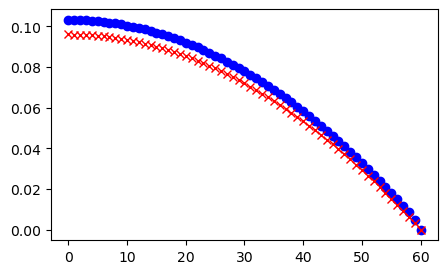

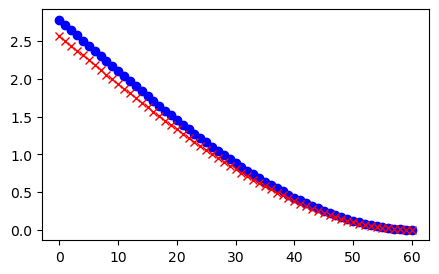

In [20]:
plt.figure(figsize=(5,3)) 
plt.plot(FEM_x[:,0],FEM_x[:,1], "o",color="blue")
plt.plot(analytica_x_list[:,0],analytica_x_list[:,1], "x",color="red")
plt.figure(figsize=(5,3)) 
plt.plot(FEM_y[:,0],FEM_y[:,1], "o",color="blue")
plt.plot(analytica_y_list[:,0],analytica_y_list[:,1], "x",color="red")

In [ ]:
## Calculate the Error between Numerical and Analytical 